# Computer Vision 

# Exercise 5: Fourier transforms

- TU Chemnitz
    - Fak. für Informatik
        - Professur Künstliche Intelligenz
            - Lehre
                - Bildverstehen
     
Contact:
* julien dot vitay at informatik dot tu-chemnitz dot de
* abbas dot al-ali at informatik dot tu-chemnitz dot de

Course web page:
[https://www.tu-chemnitz.de/informatik/KI/edu/biver/](https://www.tu-chemnitz.de/informatik/KI/edu/biver/)

## Discrete Fourier Transform

* To obtain the **discrete Fourier transform** of an image, simply apply `cv2.dft` on its grayscale version, using floats:

```python
img = cv2.imread('wall.jpg', 0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
```
* `cv2.dft` returns a complex number thanks to the flag `cv2.DFT_COMPLEX_OUTPUT`.


- **Task 1:**
    1. Load the image `wall.jpg` and show it.
    2. Apply the DFT to the image `wall.jpg`
    3. Print the shape of the DFT array. To what corresponds each axis?
    4. Display the real and imaginary part of the DFT transform. Are they informative?

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2

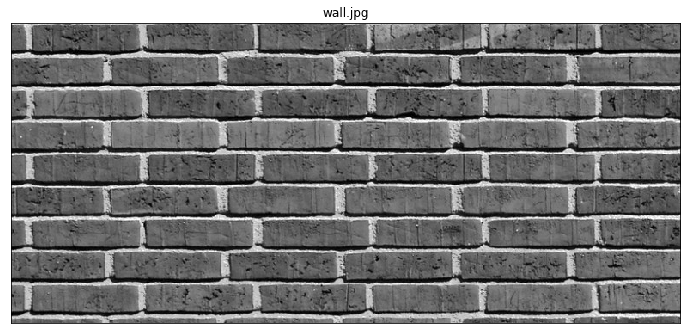

In [3]:
# Open the image
img = cv2.imread('wall.jpg', 0)
plt.figure(figsize=(12,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('wall.jpg')
plt.xticks([]); plt.yticks([])
plt.show()

dft.shape: (350, 780, 2)


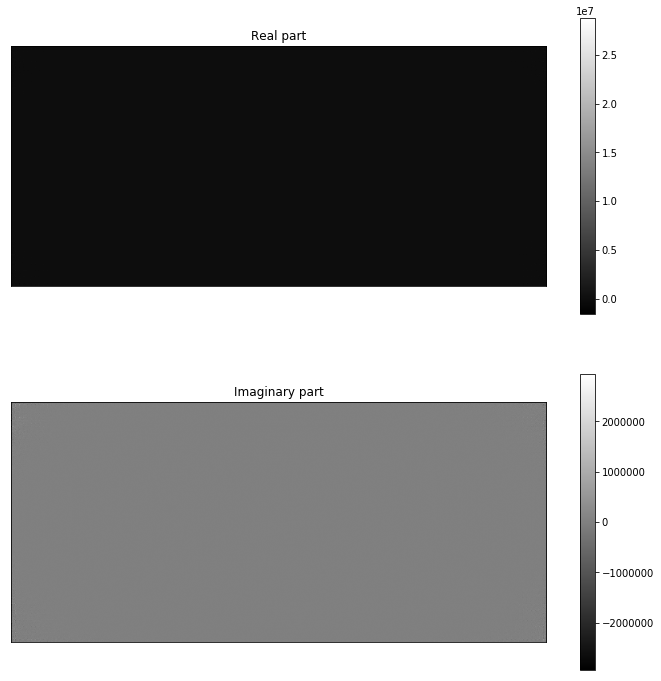

In [4]:
# Apply the discrete Fourier transform
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

print('dft.shape:',dft.shape)
plt.figure(figsize=(12,12))
# Plot the real and imaginary parts of the DFT transform
plt.subplot(211)
plt.imshow(dft[:, :, 0], cmap=plt.cm.gray)
plt.title('Real part')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.subplot(212)
plt.imshow(dft[:, :, 1], cmap=plt.cm.gray)
plt.title('Imaginary part')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

## Inverse Discrete Fourier Transform

* To reconstruct the image, apply the **discrete inverse Fourier transform** with `cv2.idft`:

```python
img_back = cv2.idft(dft, flags = cv2.DFT_REAL_OUTPUT)
```

* `cv2.idft` returns a real number thanks to the flag `cv2.DFT_REAL_OUTPUT`.


- **Task 2:** Reconstruct the image by applying `cv2.idft` and visualize the result togother with `img`:

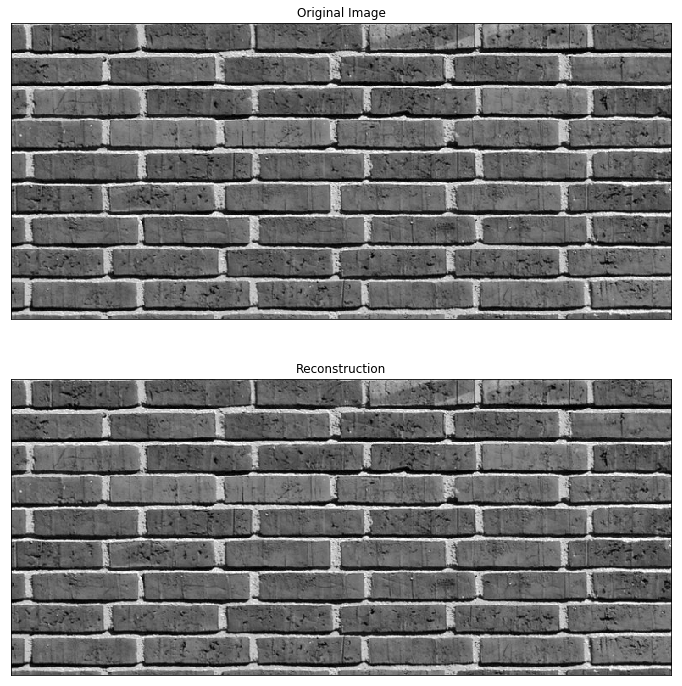

In [5]:
# Reconstruct the image
img_back = cv2.idft(dft, flags = cv2.DFT_REAL_OUTPUT)
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.xticks([]); plt.yticks([])
plt.subplot(212)
plt.imshow(img_back, cmap=plt.cm.gray)
plt.title('Reconstruction')
plt.xticks([]); plt.yticks([])
plt.show()

- **Task 3:** Use the flag `cv2.DFT_COMPLEX_OUTPUT` instead of `cv2.DFT_REAL_OUTPUT` and visualize the real and imaginary parts. What does the imaginary part represent? Comment on the range of the real part.

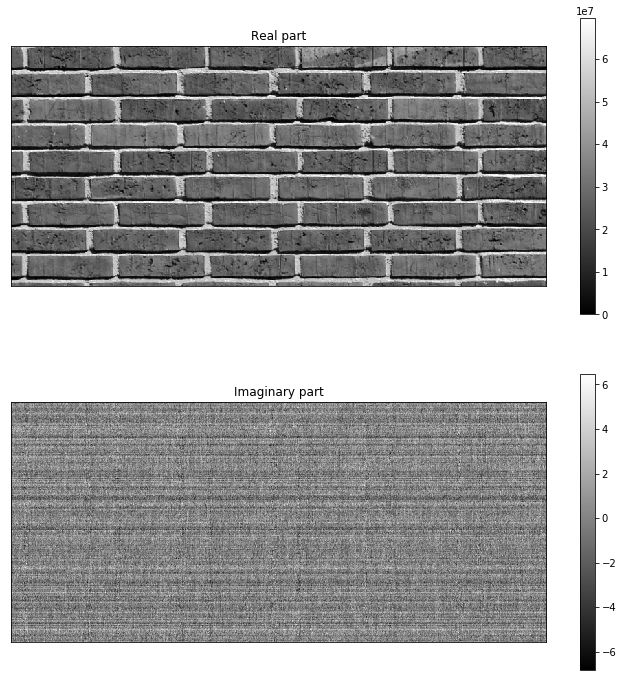

In [6]:
# Reconstruct the image as a complex number
img_complex_back = cv2.idft(dft, flags = cv2.DFT_COMPLEX_OUTPUT)
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(img_complex_back[:,:,0], cmap=plt.cm.gray)
plt.title('Real part')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.subplot(212)
plt.imshow(img_complex_back[:,:,1], cmap=plt.cm.gray)
plt.title('Imaginary part')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

## Magnitude and phase

* A more informative representation of the DFT transform is the **magnitude and phase**. You can obtain them with:

```python
magnitude = cv2.magnitude(re_part, im_part)
phase = cv2.phase(re_part, im_part)
```

- **Task 4:** Obtain the **magnitude** and the **phase** and visualize them:

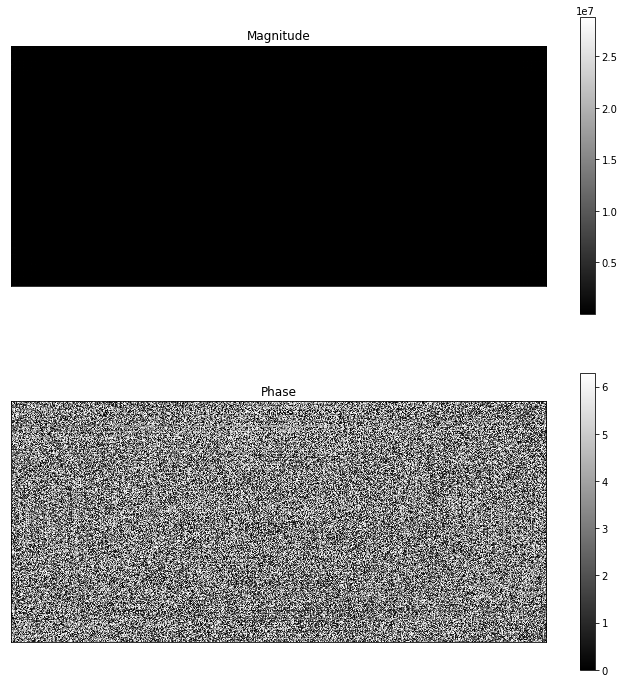

In [7]:
# Get the magnitude and phase of the DFT
magnitude = cv2.magnitude(dft[:,:,0], dft[:,:,1])
phase = cv2.phase(dft[:,:,0], dft[:,:,1])
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(magnitude, cmap=plt.cm.gray)
plt.title('Magnitude')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.subplot(212)
plt.imshow(phase, cmap=plt.cm.gray)
plt.title('Phase')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

* The magnitude is still difficult to read because it has a very high range (a lot of small values and a few very high ones).

* It is more convenient to visualize the **log-magnitude** or **spectrum** instead:

```python
spectrum = 20 * np.log(magnitude+1)
```

- **Task 5:** Replace the **magnitude** with the **spectrum** and visualize again:

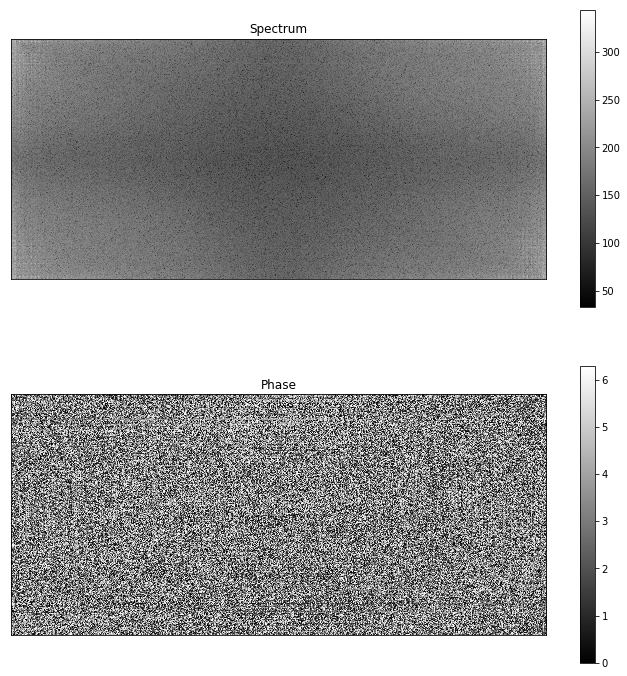

In [8]:
spectrum = 20 * np.log(magnitude+1)
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(spectrum, cmap=plt.cm.gray)
plt.title('Spectrum')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.subplot(212)
plt.imshow(phase, cmap=plt.cm.gray)
plt.title('Phase')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

* Already better, but still not what we are used to...

* By default, the DC component ($\omega_x =0$, $\omega_y =0$) is at the top-left of the plot. 

* We need to shift the center of the FFT representation to obtain something nice. We need to use numpy for that:

```python
dft_shift = np.fft.fftshift(dft)
```

- **Task 6:** Replace the **spectrum** with the shifted one and visualize again:

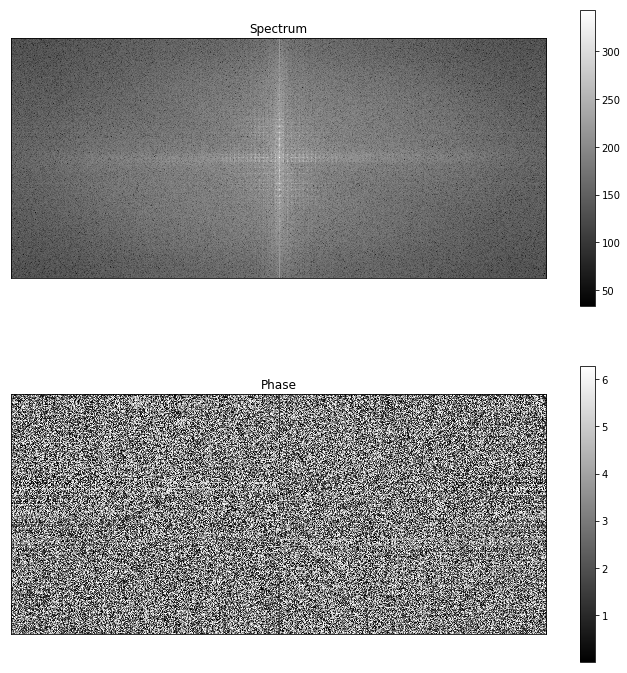

In [9]:
# Shift the center of the DFT
dft_shift = np.fft.fftshift(dft)
magnitude_shift = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
phase_shift = cv2.phase(dft_shift[:,:,0], dft_shift[:,:,1])
spectrum_shift = 20 * np.log(magnitude_shift + 1)
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(spectrum_shift, cmap=plt.cm.gray)
plt.title('Spectrum')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.subplot(212)
plt.imshow(phase_shift, cmap=plt.cm.gray)
plt.title('Phase')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

* If we work on this shifted version of the DFT, we need to *unshift* it before reconstructing.

```python
dft_unshifted = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(dft_unshifted, flags = cv2.DFT_REAL_OUTPUT)
```

## DFT in OpenCV

* So now you know how to work with DFT in OpenCV:

```python
# Get the image
img = cv2.imread('wall.jpg', 0)

# Compute the DFT
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# Shift the DFT
dft_shift = np.fft.fftshift(dft)

# Do something with the DFT

# Unshift the DFT
dft_unshifted = np.fft.ifftshift(dft_shift)

# Inverse DFT
img_back = cv2.idft(dft_unshifted, flags = cv2.DFT_REAL_OUTPUT)
```

- **Task 7:** Visualize the DFT spectrum of the various images provided (or others). Identify horizontal and vertical frequencies in each image:

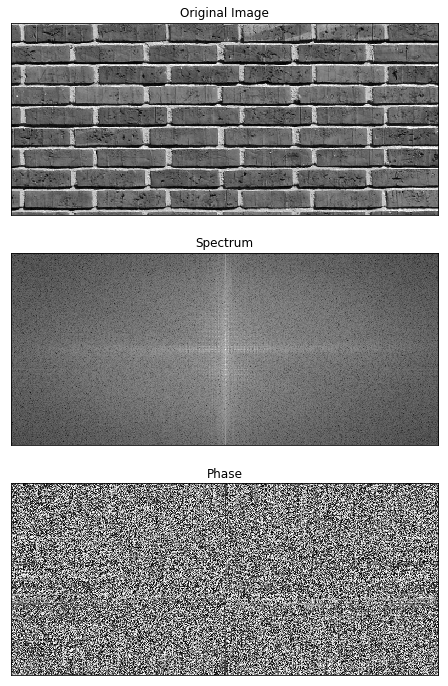

In [11]:
# Open the image
img = cv2.imread('wall.jpg', 0)
#img = cv2.imread('wall2.jpg', 0)
#img = cv2.imread('leopard.jpg', 0)
#img = cv2.imread('zebra.jpg', 0)

# Apply the discrete Fourier transform
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# Shift the center of the DFT
dft_shift = np.fft.fftshift(dft)

# Get the magnitude and phase of the Shifted DFT
magnitude_shift = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
phase_shift = cv2.phase(dft_shift[:,:,0], dft_shift[:,:,1])

spectrum_shift = 20 * np.log(magnitude_shift + 1)
plt.figure(figsize=(12,12))
plt.subplot(311)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.xticks([]); plt.yticks([])
plt.subplot(312)
plt.imshow(spectrum_shift, cmap=plt.cm.gray)
plt.title('Spectrum')
plt.xticks([]); plt.yticks([])
#plt.colorbar()
plt.subplot(313)
plt.imshow(phase_shift, cmap=plt.cm.gray)
plt.title('Phase')
plt.xticks([]); plt.yticks([])
#plt.colorbar()
plt.show()

## Box filter in the Fourier space

- **Task 8:** Let's apply a low-pass filter by setting all DFT coefficients higher than a fixed frequency to zero:


1. Define an empty matrix with the same shape as the real part of the DFT:

```python
rows, columns, _ = dft.shape
box_filter = np.zeros((rows, columns))
``` 

2. Define a rectangle of ones around the center (DC component). Its size depends on the image:

```python
delta_row = 50
delta_column = 100
box_filter[ int(rows/2 - delta_row) : int(rows/2 + delta_row), 
            int(columns/2  - delta_column) : int(columns/2 + delta_column)] = 1.0
```

3. Multiply element-wise the real and imaginary parts of the DFT transform with the box filter:

```python
dft[:, :, 0] = dft[:, :, 0] * box_filter
dft[:, :, 1] = dft[:, :, 1] * box_filter
```

4. Visualize the filter, the spectrum of the filtered image, and its reconstruction. What do you observe?

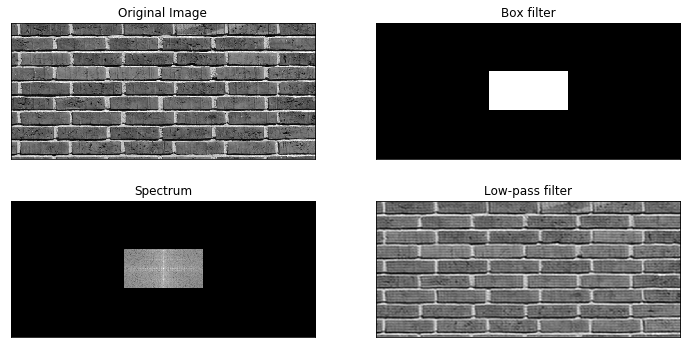

In [13]:
# Open the image
img = cv2.imread('wall.jpg', 0)
#img = cv2.imread('wall2.jpg', 0)
#img = cv2.imread('leopard.jpg', 0)
#img = cv2.imread('zebra.jpg', 0)

# Apply the discrete Fourier transform
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# Shift the center of the DFT
dft_shift = np.fft.fftshift(dft)

# Copy the DFT
result = dft_shift.copy()

# Create the box filter in frequency space
rows, columns, _ = result.shape
box_filter = np.zeros((rows, columns))

delta_row = 50
delta_column = 100
box_filter[int(rows/2 - delta_row) : int(rows/2 + delta_row),
           int(columns/2  - delta_column): int(columns/2 + delta_column)] = 1.0

# Multiply the DFT with the filter
result[:, :, 0] = result[:, :, 0] * box_filter
result[:, :, 1] = result[:, :, 1] * box_filter

# Compute the spectrum
magnitude = cv2.magnitude(result[:,:,0], result[:,:,1])
spectrum = 20 * np.log(magnitude + 1)

# Reconstruct the image
result_unshifted = np.fft.ifftshift(result)
result_back = cv2.idft(result_unshifted, flags = cv2.DFT_REAL_OUTPUT)
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.imshow(img, cmap = plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Original Image')
plt.subplot(222)
plt.imshow(box_filter, cmap = plt.cm.gray)
plt.title('Box filter')
plt.xticks([]); plt.yticks([])
plt.subplot(223)
plt.imshow(spectrum, cmap = plt.cm.gray)
plt.title('Spectrum')
plt.xticks([]); plt.yticks([])
plt.subplot(224)
plt.imshow(result_back, cmap = plt.cm.gray)
plt.title('Low-pass filter')
plt.xticks([]); plt.yticks([])
plt.show()

- **Task 9:** Suppress totally the vertical frequencies by finding adequate values for the box filter. Conclude on the locality/globality of the Fourier representation.

## Gaussian filter in the Fourier space

- **Task 10:** The box filter creates artefacts (aliasing) as the frequencies are cut too abruptly. Lets's define a Gaussian filter in the Fourier space. 


1. Let's define first coordinates $(x, y)$ supporting the Gaussian. (0, 0) should be in the middle of the image:

```python
rows, columns, _ = dft.shape
x, y = np.meshgrid(np.arange(-columns/2, columns/2), np.arange(-rows/2, rows/2))
```

2. Print x and y to see what they represent.

3. The (unscaled) Gaussian filter can then be created as a decreasing exponential function of the distance from the center:

```python
sigma_x = 20.
sigma_y = 20.
gaussian_filter = np.exp(-x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2))
```

We define here two variances, one for the horizontal frequencies, one for the vertical ones.

4. Visualize the Gaussian filter, the spectrum and the reconstructed image.

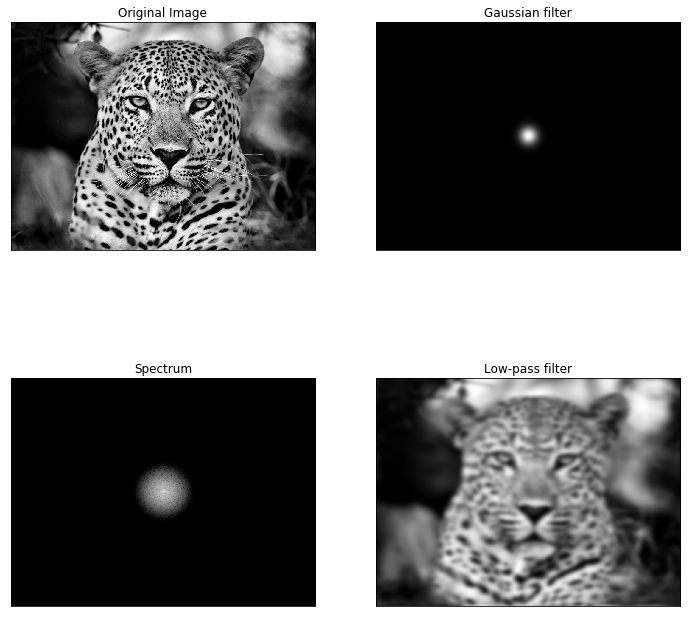

In [15]:
# Open the image
#img = cv2.imread('wall.jpg', 0)
#img = cv2.imread('wall2.jpg', 0)
img = cv2.imread('leopard.jpg', 0)
#img = cv2.imread('zebra.jpg', 0)

# Apply the discrete Fourier transform
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# Shift the center of the DFT
dft_shift = np.fft.fftshift(dft)

# Copy the DFT
result = dft_shift.copy()

# Create the box filter in frequency space
rows, columns, _ = result.shape
x, y = np.meshgrid(np.arange(-columns/2, columns/2), np.arange(-rows/2, rows/2))
sigma_x = 20.
sigma_y = 20.
gaussian_filter = np.exp(-x**2/(2*sigma_x**2) - y**2/(2.*sigma_y**2))

# Multiply the DFT with the filter
result[:, :, 0] = result[:, :, 0] * gaussian_filter
result[:, :, 1] = result[:, :, 1] * gaussian_filter

# Compute the spectrum
magnitude = cv2.magnitude(result[:,:,0], result[:,:,1])
spectrum = 20 * np.log(magnitude + 1)

# Reconstruct the image
result_unshifted = np.fft.ifftshift(result)
result_back = cv2.idft(result_unshifted, flags = cv2.DFT_REAL_OUTPUT)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(img, cmap = plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Original Image')
plt.subplot(222)
plt.imshow(gaussian_filter, cmap = plt.cm.gray)
plt.title('Gaussian filter')
plt.xticks([]); plt.yticks([])
plt.subplot(223)
plt.imshow(spectrum, cmap = plt.cm.gray)
plt.title('Spectrum')
plt.xticks([]); plt.yticks([])
plt.subplot(224)
plt.imshow(result_back, cmap = plt.cm.gray)
plt.title('Low-pass filter')
plt.xticks([]); plt.yticks([])
plt.show()

- **Task 11:** Change the two variances and observe what happens when you cut horizontal or vertical frequencies separately.

## High-pass filter

- **Task 12:** Create a high-pass filter by simply inverting the Gaussian filter. Also check on Lena. To which high-pass filter does the result look like?

```python
highpass_filter = 1. - np.exp(-x**2/(2*sigma_x**2) - y**2/(2.*sigma_y**2))
```

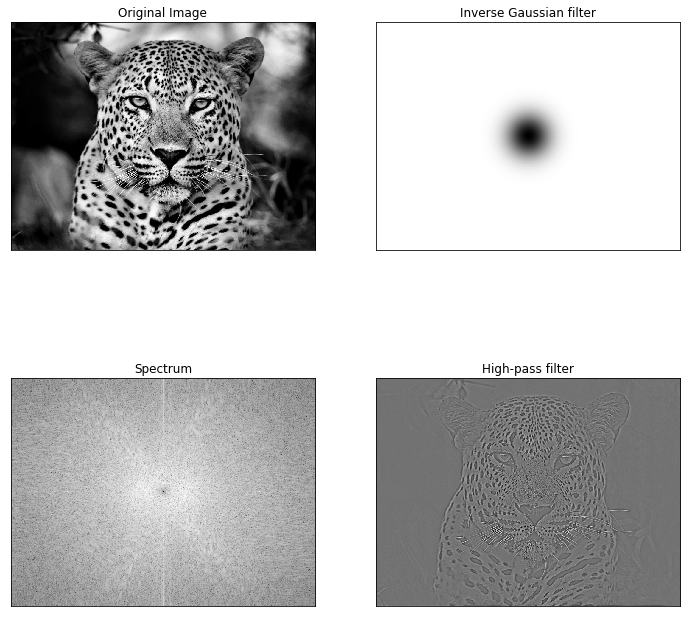

In [17]:
# Open the image
#img = cv2.imread('lena.jpg', 0)
#img = cv2.imread('wall.jpg', 0)
#img = cv2.imread('wall2.jpg', 0)
img = cv2.imread('leopard.jpg', 0)
#img = cv2.imread('zebra.jpg', 0)

# Apply the discrete Fourier transform
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# Shift the center of the DFT
dft_shift = np.fft.fftshift(dft)

# Copy the DFT
result = dft_shift.copy()

# Create the Gaussian filter in frequency space
rows, columns, _ = result.shape
x, y = np.meshgrid(np.arange(-columns/2, columns/2), np.arange(-rows/2, rows/2))
sigma_x = 50.
sigma_y = 50.
highpass_filter = 1. - np.exp(-x**2/(2*sigma_x**2) - y**2/(2.*sigma_y**2))

# Multiply the DFT with the filter
result[:, :, 0] = result[:, :, 0] * highpass_filter
result[:, :, 1] = result[:, :, 1] * highpass_filter

# Compute the spectrum
magnitude = cv2.magnitude(result[:,:,0], result[:,:,1])
spectrum = 20 * np.log(magnitude + 1)

# Reconstruct the image
result_unshifted = np.fft.ifftshift(result)
result_back = cv2.idft(result_unshifted, flags = cv2.DFT_REAL_OUTPUT)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(img, cmap = plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Original Image')
plt.subplot(222)
plt.imshow(highpass_filter, cmap = plt.cm.gray)
plt.title('Inverse Gaussian filter')
plt.xticks([]); plt.yticks([])
plt.subplot(223)
plt.imshow(spectrum, cmap = plt.cm.gray)
plt.title('Spectrum')
plt.xticks([]); plt.yticks([])
plt.subplot(224)
plt.imshow(result_back, cmap = plt.cm.gray)
plt.title('High-pass filter')
plt.xticks([]); plt.yticks([])
#plt.colorbar()
plt.show()

# Fourier transform of basic filters

- **Task 13:** We saw that convoluting an image with a filter is the same as multiplying their DFT coefficents. So let's visualize their coefficients.


1. Define a couple of 3x3 filters:

```python
# simple box filter without scaling 
box_filter = np.ones((3,3))

# creating a 5x5 Gaussian filter
x = cv2.getGaussianKernel(3, -1)
gaussian = x*x.T

# laplacian
laplacian = np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# different edge detecting filters
# sobel in x direction
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y = np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]]) 
```


2. Compute the spectrum of these 6 filters. Explain what you observe. 

In [18]:
# Simple box filter without a scaling parameter
box_filter = np.ones((3,3))

# 5x5 Gaussian filter
x = cv2.getGaussianKernel(3, -1)
gaussian = x*x.T

# Laplacian
laplacian = np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# Sobel in x direction
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# Sobel in y direction
sobel_y = np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# Scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])

In [19]:
# Put the filters in a list
filters = [box_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_names = ['Box filter', 'Gaussian', 'Laplacian', 'Sobel_x', 'Sobel_y', 'Scharr_x']

def get_spectrum(f):
    "Returns the spectrum of a filter"
    dft = cv2.dft(np.float32(f), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
    spectrum = 20*np.log(magnitude+1)
    return spectrum

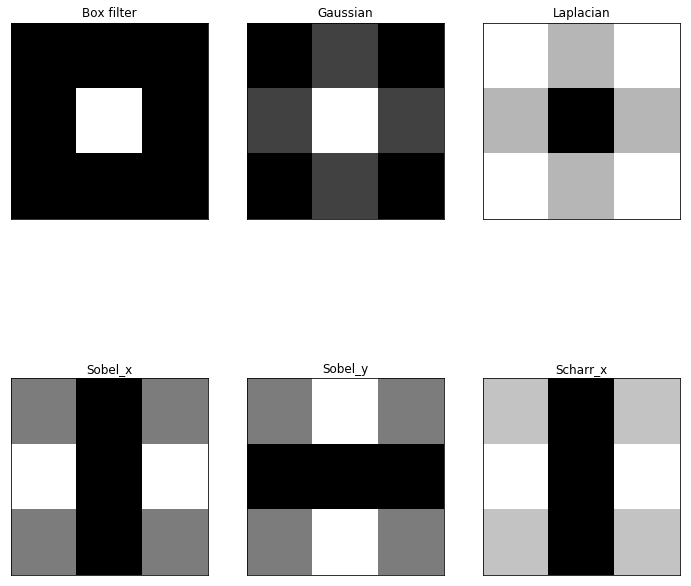

In [21]:
# Plot the spectrum of the 6 filters
plt.figure(figsize=(12,12))
for i in range(6):
    spectrum = get_spectrum(filters[i])
    plt.subplot(2,3,i+1)
    plt.imshow(spectrum, cmap =plt.cm.gray) # , interpolation='nearest')
    plt.title(filter_names[i])
    plt.xticks([]); plt.yticks([])
    
plt.show()

- **Task 13:** The Fourier transform of a 3x3 filter is also 3x3. How to multiply it with the DFT of a bigger image?


* The solution is to create an empty image of the same size as an image (e.g. 201x201):

```python
new_filter = np.zeros((201, 201))
```

* and to copy the 3x3 filter right in the middle:

```python
new_filter[99:102, 99:102] = filter
```

1. Write a function to enlarge a filter `f` to the size `(201,201)`.
2. Compute and visualize the spectrum of the 6 new filters. Explain what you observe. 

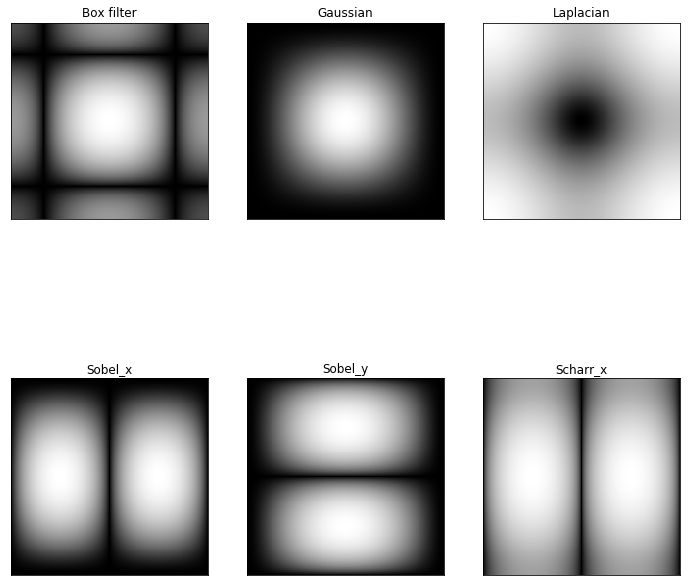

In [22]:
def enlarge_filter(f):
    "Creates an empty image and puts the filter in the center."
    result = np.zeros((201, 201))
    result[99:102, 99:102] = f
    return result
plt.figure(figsize=(12,12))
# Plot the spectrum of the enlarged filters
for i in range(6):
    f = enlarge_filter(filters[i])
    spectrum = get_spectrum(f)
    plt.subplot(2,3,i+1)
    plt.imshow(spectrum, cmap =plt.cm.gray, interpolation='nearest')
    plt.title(filter_names[i])
    plt.xticks([]); plt.yticks([])
plt.show()

3. Is the box filter a real low-pass filter? Link this to aliasing.

4. Are Sobel and Scharr really high-pass filters? How would you call them?

5. Does the DFT of the Laplacian remind you of something? Is it high-pass?

## Swapping magnitude and phase

* The goal is to see what happens when the magnitude and phase of two images are swapped.

* To recreate a DFT based on the magintude and phase, you can use `cv2.polarToCart()` and `np.stack()`:

```python
img = cv2.imread('leopard.jpg', 0)

dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

magnitude = cv2.magnitude(dft[:,:,0], dft[:,:,1])

phase = cv2.phase(dft[:,:,0], dft[:,:,1])

re, im = cv2.polarToCart(magnitude, phase)

dft_back = np.stack([re, im], axis=-1)
```

- **Task 14:** Swap the magnitude and phase of the `leopard` and `zebra` images:


1. Load the two images and obtain `dft` for both of them.
2. Obtain the magintude and phase of both images.
3. Using `cv2.polarToCart` obtain the real and imaginary parts of the `dft` of the magnitude of `leopard` and the  phase of `zebra` and vice versa.
4. Stack the real and imaginary parts of each `dft` togother.
5. Reconstruct two new images from `dft` using `idft`.
6. Show the two original images and the new ones and conclude. 

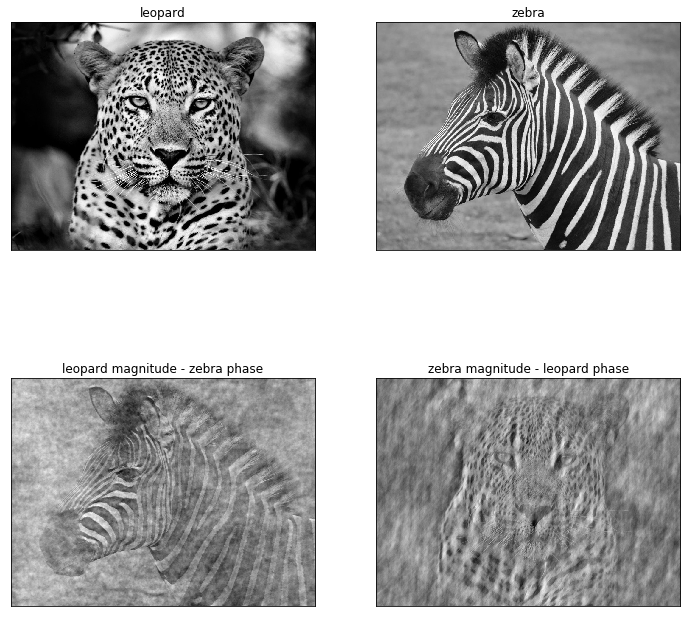

In [23]:
leopard = cv2.imread('leopard.jpg', 0)
zebra = cv2.imread('zebra.jpg', 0)

# Compute the DFT
dft_leopard = cv2.dft(np.float32(leopard), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_zebra = cv2.dft(np.float32(zebra), flags = cv2.DFT_COMPLEX_OUTPUT)

# Magnitude
magnitude_leopard = cv2.magnitude(dft_leopard[:,:,0], dft_leopard[:,:,1])
magnitude_zebra = cv2.magnitude(dft_zebra[:,:,0], dft_zebra[:,:,1])

# Phase
phase_leopard = cv2.phase(dft_leopard[:,:,0], dft_leopard[:,:,1])
phase_zebra = cv2.phase(dft_zebra[:,:,0], dft_zebra[:,:,1])

# Swap magnitude and phase 
leopard_zebra_re, leopard_zebra_im = cv2.polarToCart(magnitude_leopard, phase_zebra)
zebra_leopard_re, zebra_leopard_im = cv2.polarToCart(magnitude_zebra, phase_leopard)

# Stack the real and imaginary parts of the DFT
leopard_zebra_dft = np.stack([leopard_zebra_re, leopard_zebra_im], axis=-1)
zebra_leopard_dft = np.stack([zebra_leopard_re, zebra_leopard_im], axis=-1)

# Inverse DFT
leopard_zebra = cv2.idft(leopard_zebra_dft, flags = cv2.DFT_REAL_OUTPUT)
zebra_leopard = cv2.idft(zebra_leopard_dft, flags = cv2.DFT_REAL_OUTPUT)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(leopard, cmap = plt.cm.gray, interpolation='nearest')
plt.title('leopard')
plt.xticks([]); plt.yticks([])
plt.subplot(222)
plt.imshow(zebra, cmap = plt.cm.gray, interpolation='nearest')
plt.title('zebra')
plt.xticks([]); plt.yticks([])
plt.subplot(223)
plt.imshow(leopard_zebra, cmap = plt.cm.gray, interpolation='nearest')
plt.title('leopard magnitude - zebra phase')
plt.xticks([]); plt.yticks([])
plt.subplot(224)
plt.imshow(zebra_leopard, cmap = plt.cm.gray, interpolation='nearest')
plt.title('zebra magnitude - leopard phase')
plt.xticks([]); plt.yticks([])

plt.show()

#Here phase carries more information than magnitude